# Lab 1: Phân loại thư rác với mô hình Naive Bayes

| MSSV     | Họ tên         | Email             |
|----------|----------------|-------------------|
| 21120022 | Cao Quảng Phát    | 21120022@student.hcmus.edu.vn |
| 21120074 | Tạ Công Hoàng      | 21120074@student.hcmus.edu.vn  |


## 1. Tập dữ liệu Enron-Spam



### 1.1 Giới thiệu

- Bộ dữ liệu Enron-Spam là một nguồn tài liệu tuyệt vời được thu thập bởi V. Metsis, I. Androutsopoulos và G. Paliouras và được mô tả trong ấn phẩm của họ "Spam Filtering with Naive Bayes - Which Naive Bayes?". Bộ dữ liệu chứa tổng cộng 17.171 thư rác và 16.545 thư không phải thư rác ("ham") (tổng cộng 33.716 thư điện tử).
- Mỗi thư (1 dòng) trong tập dữ liệu có đặc điểm như sau:
  - **Subject**: Tên tiêu đề của thư.
  - **Message**: Nội dung của email. Có thể chứa chuỗi rỗng nếu tin nhắn chỉ có dòng tiêu đề và không có nội dung. Trong trường hợp chuyển tiếp email hoặc trả lời, điều này cũng chứa tin nhắn gốc với dòng tiêu đề, "từ:", "đến:", v.v.
  - **Spam/Ham**: Có giá trị "spam" hoặc "ham". Nhãn của thư được phân loại có là tin nhắn spam hay không.


### 1.2 Tải tập dữ liệu


- Tải từ moodle.
- Tải từ link drive: [link]
- Thư mục dữ liệu bao gồm 2 file: `train.csv` và `val.csv`
  - **train.csv**: Gồm những dữ liệu dùng để huấn luyện mô hình.
  - **val.csv**: Gồm những dữ liệu để đánh giá mô hình sau khi train.



### 1.3 Yêu cầu


Trong phần này, nhóm cần hoàn thành các yêu cầu sau:
- Tải xuống và đọc được toàn bộ tập dữ liệu Enron-Spam.
- Đọc dữ liệu từ file và in ra 5 dòng đầu tiên của tập dữ liệu.

### 1.4 Bài làm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# lab_folder = './'  # Replace with your dataset's path
lab_folder = '/content/drive/MyDrive/AI4Security/Lab/Lab1'  # Replace with your dataset's path
train_csv_file = lab_folder + '/train.csv'
valid_csv_file = lab_folder + '/val.csv'

train_csv_file = lab_folder + '/train.csv'
valid_csv_file = lab_folder + '/val.csv'
# test_csv_file = lab_folder + '/test.csv' # Change with your file

Mounted at /content/drive


> This code below is download the dataset from the link and set value for two variable `train_csv_file` and `val_csv_file` to store the path of the dataset.

> If you have already downloaded the dataset, you can skip this code.

In [ ]:
# Download the dataset and save it to the data folder
folder_url = 'https://drive.google.com/drive/folders/16Yn9K_ONEV2KAPcPQwwzzqkq9KZaHzWb?usp=drive_link'

import gdown, os
def download_folder_from_drive(url_folder):
    folder_files = gdown.download_folder(url_folder, quiet=True, use_cookies=False)
    print(f"Download data folder successfully!")
    print(f"List of files in the folder: {folder_files}")
    return folder_files

folder_files = download_folder_from_drive(folder_url)

# Find the csv files in the folder
for file in folder_files:
    if 'train.csv' in file:
        train_csv_file = file
    elif 'val.csv' in file:
        valid_csv_file = file
    elif 'test.csv' in file:
        test_csv_file = file
    else:
        continue

print(f"Train file: {train_csv_file}")
print(f"Valid file: {valid_csv_file}")

In [ ]:
# Read data from csv file

import pandas as pd

# Read data from file
train = pd.read_csv(train_csv_file, index_col='Message ID')
valid = pd.read_csv(valid_csv_file, index_col='Message ID')

In [ ]:
train.head(5)

,Unnamed: 0,Subject,Message,Spam/Ham,split
Message ID,,,,,
0,0,christmas tree farm pictures,NaN,ham,0.038415
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,0.696509
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,0.587792
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,-0.055438
5,5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",ham,-0.419658


In [ ]:
valid.head(5)

,Unnamed: 0,Subject,Message,Spam/Ham,split
Message ID,,,,,
23,23,miscellaneous,- - - - - - - - - - - - - - - - - - - - - - fo...,ham,-0.351998
24,24,re : purge of old contract _ event _ status,fyi - what do you all think ?\n- - - - - - - -...,ham,0.257704
32,32,valero 8018 and 1394,it is my understanding the outages valero incu...,ham,0.091200
37,37,01 / 00 natural gas nomination,enron methanol company nominates the following...,ham,-1.745133
43,43,re : misc . questions,- - - - - - - - - - - - - - - - - - - - - - fo...,ham,-1.911987


####EDA

(-1.0999999475894917,
 1.0999999909323814,
 -1.0999999570472454,
 1.0999999979546307)

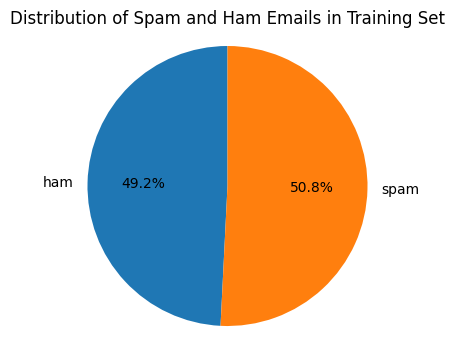

In [ ]:
import matplotlib.pyplot as plt

train_ham_count = train[train['Spam/Ham'] == 'ham'].shape[0]
train_spam_count = train[train['Spam/Ham'] == 'spam'].shape[0]

valid_ham_count = valid[valid['Spam/Ham'] == 'ham'].shape[0]
valid_spam_count = valid[valid['Spam/Ham'] == 'spam'].shape[0]

## Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.pie([train_ham_count, train_spam_count], labels=['ham', 'spam'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Spam and Ham Emails in Training Set')
plt.axis('equal')

In [ ]:
from collections import Counter

train['text'] = train['Subject'] + ' ' + train['Message']

ham_words = ' '.join(list(train[train['Spam/Ham'] == 'ham']['text'].astype(str)))
spam_words = ' '.join(list(train[train['Spam/Ham'] == 'spam']['text'].astype(str)))

ham_words = ham_words.split()
spam_words = spam_words.split()

ham_word_freq = Counter(ham_words)
spam_word_freq = Counter(spam_words)

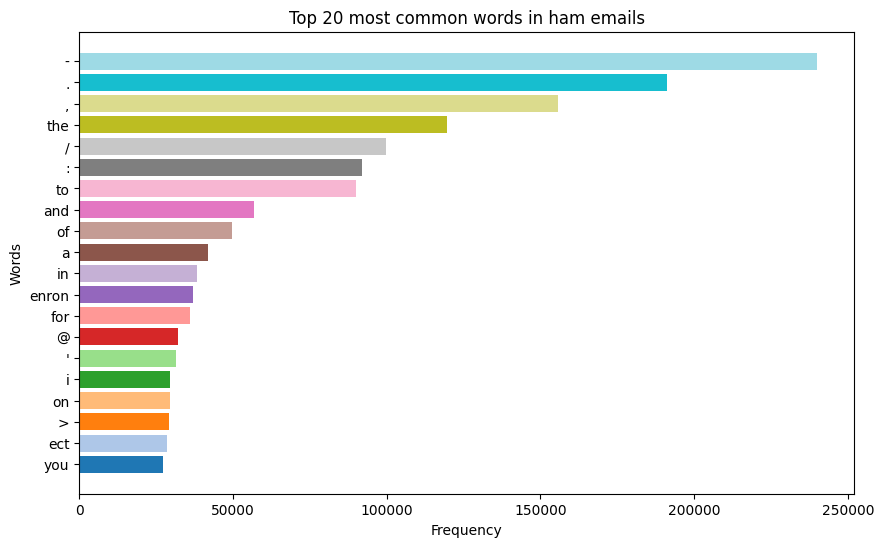

In [ ]:
# Visualize the most common words in ham emails
import matplotlib.pyplot as plt
import numpy as np

ham_word_freq_df = pd.DataFrame(ham_word_freq.most_common(20), columns=['word', 'frequency'])
ham_word_freq_df = ham_word_freq_df.sort_values(by='frequency')

colors = plt.cm.tab20(np.linspace(0, 1, 20))

plt.figure(figsize=(10, 6))
plt.barh(ham_word_freq_df['word'], ham_word_freq_df['frequency'], color=colors)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 most common words in ham emails')
plt.show()

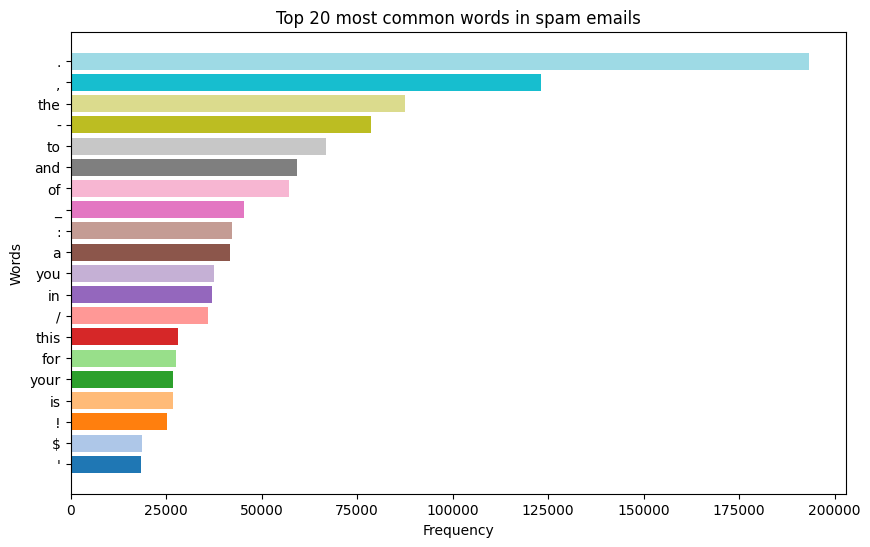

In [ ]:
# Visualize the most common words in spam emails

spam_word_freq_df = pd.DataFrame(spam_word_freq.most_common(20), columns=['word', 'frequency'])
spam_word_freq_df = spam_word_freq_df.sort_values(by='frequency')

colors = plt.cm.tab20(np.linspace(0, 1, 20))

plt.figure(figsize=(10, 6))
plt.barh(spam_word_freq_df['word'], spam_word_freq_df['frequency'], color=colors)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 most common words in spam emails')
plt.show()

In [ ]:
train.drop(columns=['text'], inplace=True)

## 2. Tiền xử lý dữ liệu



### 2.1 Về dữ liệu



- Nội dung dữ liệu:
  - **Đầu vào** gồm có 2 đặc trưng: `Subject`, `Message`.
  - **Đầu ra** là một nhãn của email: `Spam` hoặc `Ham`.



### 2.2 Yêu cầu


Trong phần này, nhóm cần hoàn thành các yêu cầu sau:
- (Optional) Làm sạch dữ liệu nếu có thể: kiểm tra những dòng bị lặp, biến đổi/sắp xếp thứ tự các dòng dữ liệu lại, ...
- Các nhóm được phép sử dụng thêm một số phương pháp khác để gia tăng hiệu quả của mô hình nhưng nhóm cần cho biết phương pháp mình áp dụng là gì và mức độ cải thiện cụ thể gia tăng bao nhiêu.

### 2.3 Bài làm

CleanData bao bồm các bước sau:
1. Drop những column không cần thiết.
2. Xóa những dòng dữ liệu trùng lặp.
3. Điền giá trị " " vào những ô dữ liệu là NaN.
4. Nối cột Subject và Message thành một cột mới là "full_message".
5. Xoá dấu câu
6. Xoá stop words
7. Stemming, Lemmatization

In [ ]:
dropColumns = ['Unnamed: 0', 'split']
resultCol = 'Result'
renameColumns = {'Spam/Ham': resultCol}

def data_cleaning(df, name=""):
    try:
      df.drop(columns=dropColumns, inplace=True)
    except:
      pass

    try:
      df.rename(columns=renameColumns, inplace=True)
    except:
      pass

    try:
      df.fillna({'Subject': ' ', 'Message': ' '}, inplace=True)
      df.drop_duplicates(keep='first', inplace=True)
      df['full_message'] = [' '.join([subject, message]) for subject, message in zip(df['Subject'], df['Message'])]
    except:
      print(f"Cannot find Subject and Message Column from file {name}")
      pass

    if 'full_message' not in df.columns:
      print(f"Cannot find full_message Column from file {name}")
      return df
    else:
      print(f"Found full_message Column from file {name}")

    print(f'shape {name}: ', df.shape)
    # assert if some field is not zero
    assert df.isnull().sum().sum() == 0
    assert df.duplicated().sum() == 0
    return df

train = data_cleaning(train, "train data")
valid = data_cleaning(valid, "valid data")

assert train.isnull().sum().sum() == 0
assert train.duplicated().sum() == 0
assert valid.isnull().sum().sum() == 0
assert valid.duplicated().sum() == 0

Found full_message Column from file train data
shape train data:  (25023, 4)
Found full_message Column from file valid data
shape valid data:  (3033, 4)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25023 entries, 0 to 33714
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Subject       25023 non-null  object
 1   Message       25023 non-null  object
 2   Result        25023 non-null  object
 3   full_message  25023 non-null  object
dtypes: object(4)
memory usage: 977.5+ KB


In [ ]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3033 entries, 23 to 33692
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Subject       3033 non-null   object
 1   Message       3033 non-null   object
 2   Result        3033 non-null   object
 3   full_message  3033 non-null   object
dtypes: object(4)
memory usage: 118.5+ KB


In [ ]:
# Some methods to get data
def hamData():
  return train[train[resultCol] == 'ham']
def spamData():
  return train[train[resultCol] == 'spam']

#### Preprocessed data

In [ ]:
# data preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Follow this blog: https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/#:~:text=Text%20preprocessing%20is%20an%20essential,part%2Dof%2Dspeech%20tagging.
def lower_text(text):
    return text.lower()

def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

def remove_stopwords(text):
    stopwords = nltk.corpus.stopwords.words('english')
    output= [i for i in text if i not in stopwords]
    return output

def stemming(text):
    porter_stemmer = PorterStemmer()
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

def lemmatizer(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

def preprocess_text_pipeline(text):
  """
  Preprocesses a given text string.
  """
   # 1. Lowercasing & Remove special word ???:
  text = lower_text(text)

  # 2. Removing punctuation:
  text = remove_punctuation(text)

  # 3. Tokenization:
  tokens = word_tokenize(text)

  # 4. Removing stop words:
  #Stop words present in the library
  # stopwords = nltk.corpus.stopwords.words('english')
  # stopwords[0:10]
  tokens = remove_stopwords(tokens)

  # 5. Stemming
  tokens = stemming(tokens)

  # 6. Lemmatization:
  tokens = lemmatizer(tokens)

  return ' '.join(tokens)

In [ ]:
# Preprocess Train Text
train['transform_text'] = train['full_message'].astype('U').apply(preprocess_text_pipeline)
train.sample(5)

,Subject,Message,Result,full_message,transform_text
Message ID,,,,,
21937,looking for cheap high - quality software ? ex...,"subject , about , natural red woman . my mothe...",spam,looking for cheap high - quality software ? ex...,look cheap high qualiti softwar extrapol earth...
20252,inncenot bitcehs gushing loads,"ello , ' ello , ' ello , what have we got her...",spam,"inncenot bitcehs gushing loads ello , ' ello ...",inncenot bitceh gush load ello ello ello got a...
8592,re : livelink test for research,moyez lallani has agreed to give a presentatio...,ham,re : livelink test for research moyez lallani ...,livelink test research moyez lallani agre give...
24992,do you need a second mortgage ? 22956,let\nmortgage lenders compete for your busines...,spam,do you need a second mortgage ? 22956 let\nmor...,need second mortgag 22956 let mortgag lender c...
10362,v foorever,"hello , welcome to pha russian rmonline sho in...",spam,"v foorever hello , welcome to pha russian rmon...",v foorev hello welcom pha russian rmonlin sho ...


In [ ]:
# Preprocess valid Text
valid['transform_text'] = valid['full_message'].astype('U').apply(preprocess_text_pipeline)
valid.sample(5)

,Subject,Message,Result,full_message,transform_text
Message ID,,,,,
14242,eol click trade curtailment and banner,"jay - - consistent with my voicemail to you , ...",ham,eol click trade curtailment and banner jay - -...,eol click trade curtail banner jay consist voi...
19889,hello !,what are the washing instructions ?\nadio\n,spam,hello ! what are the washing instructions ?\na...,hello wash instruct adio
24641,weekly stock report vjf,"gaming advisor\nnews july 16 , 2002 i 2 corp e...",spam,weekly stock report vjf gaming advisor\nnews j...,weekli stock report vjf game advisor news juli...
33560,super markdowns on quality medicines .,licensed professionals will examine your case ...,spam,super markdowns on quality medicines . license...,super markdown qualiti medicin licens professi...
21764,cheap pharmacy wj,want new overseas drugs ? http : / / www . sjo...,spam,cheap pharmacy wj want new overseas drugs ? ht...,cheap pharmaci wj want new oversea drug http w...


#### EDA

In [ ]:
ham_words = ' '.join(list(train[train['Result'] == 'ham']['transform_text'].astype(str)))
spam_words = ' '.join(list(train[train['Result'] == 'spam']['transform_text'].astype(str)))

ham_words = ham_words.split()
spam_words = spam_words.split()

ham_word_freq = Counter(ham_words)
spam_word_freq = Counter(spam_words)

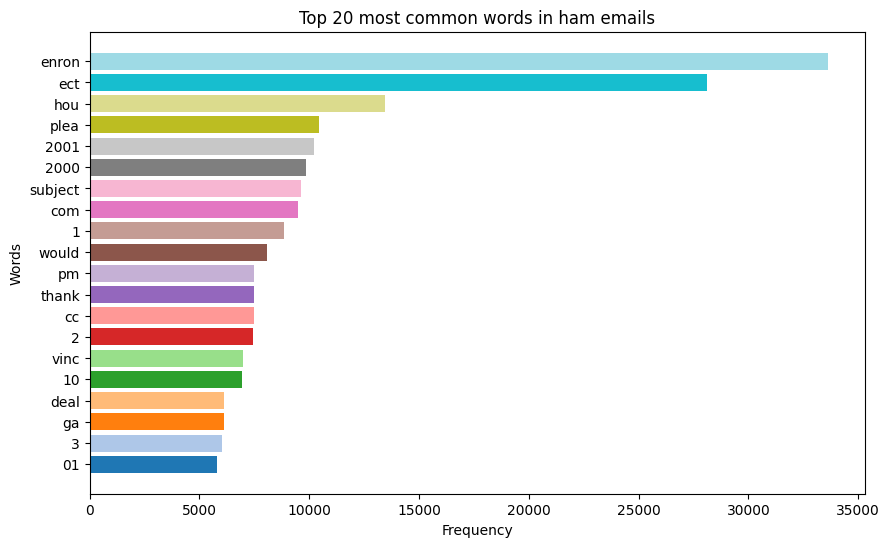

In [ ]:
ham_word_freq_df = pd.DataFrame(ham_word_freq.most_common(20), columns=['word', 'frequency'])
ham_word_freq_df = ham_word_freq_df.sort_values(by='frequency')

colors = plt.cm.tab20(np.linspace(0, 1, 20))

plt.figure(figsize=(10, 6))
plt.barh(ham_word_freq_df['word'], ham_word_freq_df['frequency'], color=colors)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 most common words in ham emails')
plt.show()

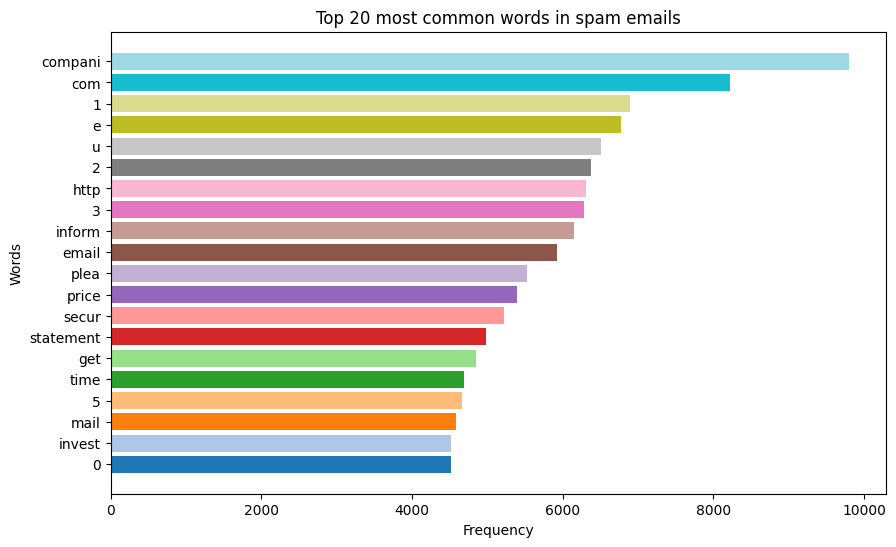

In [ ]:
spam_word_freq_df = pd.DataFrame(spam_word_freq.most_common(20), columns=['word', 'frequency'])
spam_word_freq_df = spam_word_freq_df.sort_values(by='frequency')

colors = plt.cm.tab20(np.linspace(0, 1, 20))

plt.figure(figsize=(10, 6))
plt.barh(spam_word_freq_df['word'], spam_word_freq_df['frequency'], color=colors)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 most common words in spam emails')
plt.show()

## 3. Các yêu cầu về mô hình



### 3.1 Mô hình



Lab này không giới hạn cách làm cho việc phân loại thư rác, miễn là các bạn sử dụng các mô hình phân loại và có thực hiện học có giám sát (supervised learning).



### 3.2 Yêu cầu


Trong phần này, nhóm cần hoàn thành các yêu cầu sau:
- Trình bày cấu trúc và cách thiết kế mô hình mình chọn một cách cụ thể, chi tiết từng bước tính toán từ đầu vào cho đến đầu ra.
- Trong mã nguồn, nếu nhóm sử dụng các tham số đặc biệt nào đó thì cần tìm hiểu và giải thích lý do tại sao chọn.
- Sau khi huấn luyện, cho biết độ chính xác của mô hình đối với toàn bộ tập dữ liệu (bao gồm cả tập trainset và valset). Có thể sử dụng nhiều cách để đánh giá và cần giải thích những đánh giá ấy có ý nghĩa gì.

### 3.3 Bài làm

#### Mô hình
- Mô hình được chọn là Multinomial Naive Bayes.
    - Tham số `alpha = 1.0` (Mặc định)
- Vector hóa dữ liệu sử dụng Bag of Words.
    - `analyzer='word'`: Để xử lý từng từ.
    - `ngram_range=(1,2)`: Đếm số lần xuất hiện của từng từ và cặp từ.

#### Flow từng bước tính toán
**Training**:
1. Clean data.
2. Preprocess data: Loại bỏ và chuẩn hóa dữ liệu.
3. Vector hóa dữ liệu bằng Bag of Words.
4. Huấn luyện mô hình Multinomial Naive Bayes.

**Validation**:
1. Clean data.
2. Preprocess data: Loại bỏ và chuẩn hóa dữ liệu.
3. Sử dụng Vector hóa dữ liệu đã được fit từ tập train để transform dữ liệu valid.
4. Đánh giá mô hình.

**Testing**: Người dùng nhập vào một email bất kỳ.
1. Ráp subjet và message thành một dữ liệu duy nhất.
2. Preprocess dữ liệu.
3. Sử dụng Vector hóa dữ liệu đã được fit từ tập train để transform dữ liệu test.
4. Dự đoán xem email đó có phải là spam hay không.



#### Training Model

In [21]:
# Import Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report, fbeta_score, recall_score, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV, GridSearchCV

# Save Model
import pickle

##### Encode data, label

In [22]:
encoder = LabelEncoder()
train[resultCol] = encoder.fit_transform(train[resultCol])
# train[resultCol] = encoder.inverse_transform(train[resultCol]) # Use this method to revert label
train.sample()

,Subject,Message,Result,full_message,transform_text
Message ID,,,,,
12186,in case you didn ' t notice,"louise ,\noffice depot has the epson stylus 78...",0,"in case you didn ' t notice louise ,\noffice d...",case notic louis offic depot epson stylu 785 e...


In [23]:
# count spam row
valid[resultCol] = encoder.transform(valid[resultCol])
valid.sample()

,Subject,Message,Result,full_message,transform_text
Message ID,,,,,
16712,thursday plans,"billy williams ,\nre . thursday summer solstic...",0,"thursday plans billy williams ,\nre . thursday...",thursday plan billi william thursday summer so...


In [24]:
encoder.classes_

array(['ham', 'spam'], dtype=object)

##### Split data

In [25]:
X_train_no_preprocess = train['full_message']
X_valid_no_preprocess = valid['full_message']

X_train_preprocess = train['transform_text']
X_valid_preprocess = valid['transform_text']

y_train = train[resultCol]
y_valid = valid[resultCol]

##### Support Class

In [26]:
import copy

class ModelData:
  def __init__(self, X_train, y_train, X_valid, y_valid, data_name = ""):
    self.X_train = copy.deepcopy(X_train)
    self.y_train = copy.deepcopy(y_train)
    self.y_valid = copy.deepcopy(y_valid)
    self.X_valid = copy.deepcopy(X_valid)
    self.data_name = data_name
  def getName(self):
    return self.data_name

plain_model_data = ModelData(X_train_no_preprocess, y_train, X_valid_no_preprocess, y_valid, "plain_data")
preprocess_model_data = ModelData(X_train_preprocess, y_train, X_valid_preprocess, y_valid,  "preprocess_data")

In [27]:
def create_BoWVectorlization_instance():
  return CountVectorizer(analyzer='word', ngram_range=(1,2))

In [28]:
class ModelConfig:
  def __init__(self, baseModel, hparamsSpace, modelName):
    self.baseModel = baseModel
    self.hparamsSpace = hparamsSpace
    self.modelName = modelName
  def getModelName(self):
    return self.modelName

class NaiveBayesConfig(ModelConfig):
  def __init__(self):
    self.hparamsSpace = {'alpha': [0.01, 0.1, 0.5, 1.0, 1.5, 5.0, 10.0]}
    super().__init__(MultinomialNB(), self.hparamsSpace, "NaiveBayes")

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import os

class Model:
  def __init__(self, modelConfig, modelData, vectorlization, name = ""):
    self.modelConfig = modelConfig
    self.modelData = copy.deepcopy(modelData)
    self.modelDataVectorlized = None   # ModelData after vectorlization
    self.vectorlization = vectorlization
    self.model = None
    self.name = name

    print(f'init model {self.getModelName()}')
    self.fitVectorlization()
    self.vectorlizedModelData()


  def fitVectorlization(self):
    self.vectorlization.fit_transform(self.modelData.X_train)
    return self
  def vectorlizedModelData(self):
    self.modelDataVectorlized = ModelData(
        self.vectorlization.transform(self.modelData.X_train),
        self.modelData.y_train,
        self.vectorlization.transform(self.modelData.X_valid),
        self.modelData.y_valid,
        self.modelData.getName()
    )
    return self

  def getModelName(self):
    if self.name != "":
      return self.name
    return "_".join([self.modelConfig.getModelName(), self.modelData.getName()])

  def getModelSaveFile(self, suffixName = ""):
    return lab_folder + "/" + self.getModelName() + suffixName +  '.pkl'

  def loadModel(self):
    saveFile = self.getModelSaveFile()
    if os.path.exists(saveFile):
      with open(saveFile, 'rb') as file:
        self.model = pickle.load(file)
      print(f"Model {self.getModelName()} load from {saveFile}")
      return True
    else:
      print(f"Cannot find Model {self.getModelName()} to load")
      return False

  def saveModel(self, suffixName = ""):
    if self.model is None:
      print(f"Model {self.getModelName()} is not trained")
      return
    saveFile = self.getModelSaveFile(suffixName)
    if os.path.exists(saveFile):
      os.remove(saveFile)
    with open(saveFile, 'wb') as file:
      pickle.dump(self.model, file)
    print(f"Model {self.getModelName()} saved to {saveFile}")

  def train(self):
    """
    Train with default hyperparameters
    """
    if(self.model is not None):
      print(f"Model {self.getModelName()} is already trained")
      return self
    print(f"Start training model {self.getModelName()}")
    self.model = self.modelConfig.baseModel
    self.model.fit(self.modelDataVectorlized.X_train, self.modelDataVectorlized.y_train)
    return self

  def optimize_with_search(self, scoring = 'accuracy'):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=self.modelConfig.baseModel, param_grid=self.modelConfig.hparamsSpace, n_jobs=-1, cv=5, scoring=scoring, verbose=2)

    print(f"Start Grid Search of {self.getModelName()} with scoring {scoring}")
    result = grid_search.fit(self.modelDataVectorlized.X_train, self.modelDataVectorlized.y_train)
    self.model = result.best_estimator_
    self.saveModel(f"_{scoring}_best")
    print(f"Best: {result.best_score_} using {result.best_params_}")
    return result

  def predict(self, X):
    if self.model is None:
      print("Model is not trained")
      return None
    X = self.vectorlization.transform(X)
    return self.model.predict(X)

  def y_predict(self):
    return self.predict(self.modelData.X_valid)

  def y_true(self):
    return self.modelData.y_valid

  def evaluate_valid(self, is_report = False):
    return self.evaluate(self.modelData.X_valid, self.modelData.y_valid, is_report)
  def evaluate_train(self, is_report = False):
    return self.evaluate(self.modelData.X_train, self.modelData.y_train, is_report)

  def evaluate(self, X = None, y = None, is_report = False):
    if self.model is None:
      print("Model is not trained")
      return None
    if X is None or y is None:
      print("X or y is None")
      return None

    if(is_report):
      print(f"Model {self.getModelName()}")

    y_predict = self.predict(X)
    y_true = y

    accuracy = accuracy_score(y_true, y_predict)
    precision = precision_score(y_true, y_predict)
    recall = recall_score(y_true, y_predict)
    f1 = f1_score(y_true, y_predict)
    cm = confusion_matrix(y_true, y_predict)

    if(is_report):
      print(f"Accuracy: {accuracy}")
      print(f"Precision: {precision}")
      print(f"Recall: {recall}")
      print(f"F1: {f1}")
      sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
      plt.show()

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "confusion_matrix": confusion_matrix
    }


##### Train model

init model NaiveBayes_preprocess_data_BoW
Model NaiveBayes_preprocess_data_BoW load from /content/drive/MyDrive/AI4Security/Lab/Lab1/NaiveBayes_preprocess_data_BoW.pkl
Model NaiveBayes_preprocess_data_BoW
Accuracy: 0.9904385097263435
Precision: 0.9927248677248677
Recall: 0.9881500987491771
F1: 0.9904322005938634


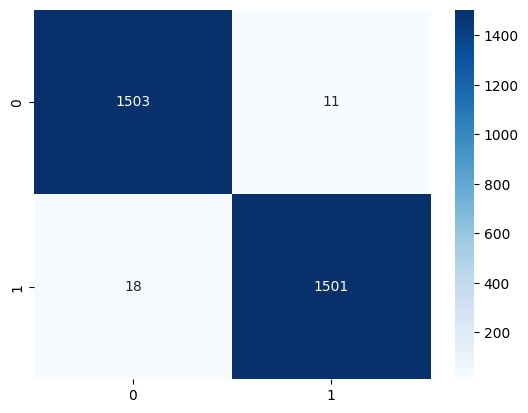

{'accuracy': 0.9904385097263435,
 'precision': 0.9927248677248677,
 'recall': 0.9881500987491771,
 'f1': 0.9904322005938634,
 'confusion_matrix': <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>}

In [30]:
naiveBayesModel = Model(NaiveBayesConfig(), preprocess_model_data, create_BoWVectorlization_instance(), name="NaiveBayes_preprocess_data_BoW")

if not naiveBayesModel.loadModel():
  naiveBayesModel.train()
  naiveBayesModel.saveModel()

# Evaluate Model with Valid Data
naiveBayesModel.evaluate_valid(is_report=True)

Model NaiveBayes_preprocess_data_BoW
Accuracy: 0.997642169204332
Precision: 0.9987528061860813
Recall: 0.9963503649635036
F1: 0.9975501391022713


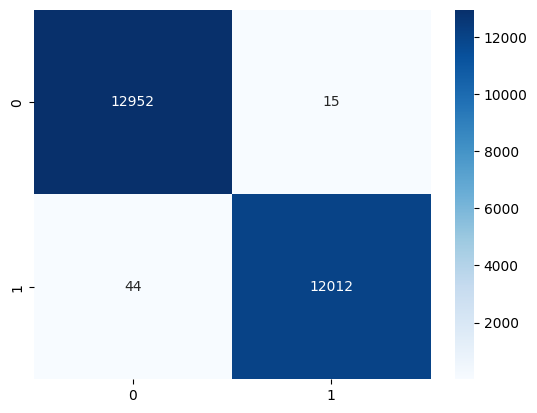

{'accuracy': 0.997642169204332,
 'precision': 0.9987528061860813,
 'recall': 0.9963503649635036,
 'f1': 0.9975501391022713,
 'confusion_matrix': <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>}

In [31]:
# Evaluate Model with Training Data
naiveBayesModel.evaluate_train(is_report=True)

In [32]:
# Optimize with Grid Search
naiveBayesModel.optimize_with_search(scoring='accuracy')

Start Grid Search of NaiveBayes_preprocess_data_BoW with scoring accuracy
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Model NaiveBayes_preprocess_data_BoW saved to /content/drive/MyDrive/AI4Security/Lab/Lab1/NaiveBayes_preprocess_data_BoW_accuracy_best.pkl
Best: 0.9880509418638915 using {'alpha': 0.1}


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 1.5, 5.0, 10.0]},
             scoring='accuracy', verbose=2)

init model NaiveBayes_preprocess_data_BoW_accuracy_best
Model NaiveBayes_preprocess_data_BoW_accuracy_best load from /content/drive/MyDrive/AI4Security/Lab/Lab1/NaiveBayes_preprocess_data_BoW_accuracy_best.pkl
Model NaiveBayes_preprocess_data_BoW_accuracy_best
Accuracy: 0.9914276294098252
Precision: 0.9927392739273927
Recall: 0.990125082290981
F1: 0.991430454845089


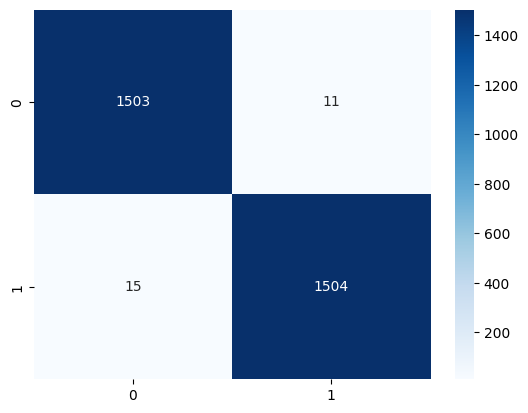

{'accuracy': 0.9914276294098252,
 'precision': 0.9927392739273927,
 'recall': 0.990125082290981,
 'f1': 0.991430454845089,
 'confusion_matrix': <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>}

In [33]:
optimal_naiveBayesModel = Model(NaiveBayesConfig(), preprocess_model_data, create_BoWVectorlization_instance(), name="NaiveBayes_preprocess_data_BoW_accuracy_best")
optimal_naiveBayesModel.loadModel()

# Evaluate Model with Valid Data
optimal_naiveBayesModel.evaluate_valid(is_report=True)

Model NaiveBayes_preprocess_data_BoW_accuracy_best
Accuracy: 0.9990808456220277
Precision: 0.9995848210578759
Recall: 0.9985069674850697
F1: 0.9990456035520147


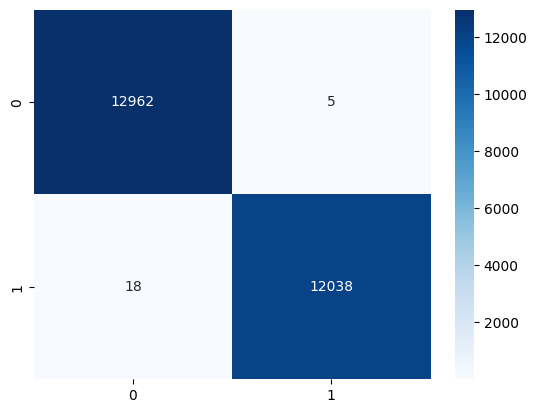

{'accuracy': 0.9990808456220277,
 'precision': 0.9995848210578759,
 'recall': 0.9985069674850697,
 'f1': 0.9990456035520147,
 'confusion_matrix': <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>}

In [34]:
optimal_naiveBayesModel.evaluate_train(is_report=True)

## 4. Thử nghiệm thực tế

### 4.1 Mục đích


Mặc dù ta đã có tập dữ liệu val set để đánh giá mô hình, nhưng ta vẫn muốn thử khả năng của mô hình bằng cách viết email trực tiếp.



### 4.2 Yêu cầu


Trong phần này, nhóm cần hoàn thành các yêu cầu sau:
- **Chức năng 1**: Viết chương trình cho phép người dùng nhập vào một email bất kỳ (gồm tiêu đề và nội dung). Sau khi áp dụng các phương pháp tiền xử lý giống như đã làm với tập dữ liệu, chương trình chạy mô hình và trả ra kết quả dự đoán cho email vừa nhập.
- **Chức năng 2**: Chương trình phải cho phép đọc một file "csv" (Comma separated value) bất kỳ có cấu trúc như file `val.csv` (Bao gồm thông tin tiêu đề, nội dung và nhãn cho từng email) và thực hiện đánh giá kết quả dự đoán như đã thực hiện với tập `val.csv`.

### 4.3 Bài làm

#### Chức năng 1

In [35]:
class Email:
    def __init__(self, subject, message):
        self.subject = subject
        self.message = message
        self.full_message = ' '.join([subject, message])

    def preprocess_text(self):
        return preprocess_text_pipeline(self.full_message)

    def predict(self, model):
        return model.predict([self.preprocess_text()])[0]

    def get_result(self, model):
        return encoder.inverse_transform([self.predict(model)])[0]

In [36]:
def input_email():
    print(f"Input email:")
    subject = input("Subject: ")
    message = input("Message: ")
    return Email(subject, message)

def predict_email(email, model):
    result = email.get_result(model)
    print(f"Subject: {email.subject}")
    print(f"Message: {email.message}")
    print(f"Result: {result}")

def program_1():
    email = input_email()
    predict_email(email, optimal_naiveBayesModel)

program_1()

Input email:
Subject: 𝗔𝗖𝗧𝗜𝗩𝗔𝗧𝗢𝗥 𝗦𝗖𝗛𝗢𝗟𝗔𝗥𝗦𝗛𝗜𝗣
Message: Learn about a new opportunity.
Subject: 𝗔𝗖𝗧𝗜𝗩𝗔𝗧𝗢𝗥 𝗦𝗖𝗛𝗢𝗟𝗔𝗥𝗦𝗛𝗜𝗣
Message: Learn about a new opportunity.
Result: spam


#### Chức năng 2

Saving test.csv to test.csv
Found full_message Column from file data
shape data:  (3348, 6)
Model NaiveBayes_preprocess_data_BoW_accuracy_best
Accuracy: 0.9931302270011948
Precision: 0.9948424068767908
Recall: 0.992
F1: 0.9934191702432046


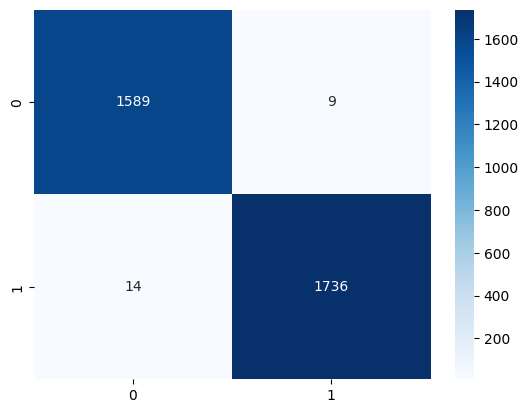

In [37]:
from google.colab import files

def evaluation_model_with_file(data):

    data = data_cleaning(data, "data")
    data['transform_text'] = data['full_message'].astype('U').apply(preprocess_text_pipeline)

    X = data['transform_text']
    y = encoder.transform(data[resultCol])

    optimal_naiveBayesModel.evaluate(X, y, is_report=True)

def program_2():
    uploaded = files.upload()
    if not uploaded:
        print("No file selected")
        return
    filename = list(uploaded.keys())[0]
    df = pd.read_csv(filename)
    evaluation_model_with_file(df)

program_2()

##### Full Program

In [38]:
def design_terminal():
    print("1. Predict your custom email")
    print("2. Evaluate model with csv file")
    print("3. Exit")

def program():
    while True:
        design_terminal()
        choice = input("Choose your option: ")
        if choice == '1':
            program_1()
        elif choice == '2':
            program_2()
        elif choice == '3':
            break
        else:
            print("Invalid choice")

program()

1. Predict your custom email
2. Evaluate model with csv file
3. Exit
Choose your option: 3


## Test phase

In [ ]:
test_csv_file = '../test.csv'
evaluation_model_with_file(test_csv_file)

In [ ]:
# download from: https://www.kaggle.com/datasets/venky73/spam-mails-dataset?resource=download
another_test_file = '../spam_ham_dataset.csv'

test = pd.read_csv(another_test_file)
test.drop(columns=['Unnamed: 0', 'label_num'], inplace=True)
test.rename(columns={'text': 'full_message', 'label': 'Result'}, inplace=True)
test.to_csv('./test.csv')
test

In [ ]:
test_csv_file = './test.csv'
evaluation_model_with_file(test_csv_file)